<a href="https://colab.research.google.com/github/Taejin1221/MachineLearning/blob/master/ResNet_58layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import datasets

In [0]:
n = 9

In [0]:
inputs = keras.Input( shape = ( 32, 32, 3 ), name = 'input' )

identity = layers.Conv2D( filters = 16, kernel_size = [ 7, 7 ],
                       padding = 'Same', activation = 'relu' )(inputs)

# block 1
for _ in range( n ):
    output = layers.Conv2D( filters = 16, kernel_size = [ 3, 3 ],
                           padding = 'Same' )(identity)
    output = layers.BatchNormalization()(output)
    output = layers.Activation('relu')(output)
    
    output = layers.Conv2D( filters = 16, kernel_size = [ 3, 3 ],
                           padding = 'Same' )(output)
    output = layers.BatchNormalization()(output)
    
    output = layers.Add()( [ output, identity ] )
    identity = layers.Activation('relu')(output)

identity = layers.MaxPooling2D( pool_size = [ 3, 3 ], padding = 'same',
                               strides = 2 )(identity)

In [0]:
# block 2
identity = layers.ZeroPadding2D( [ 0, 8 ], 'channels_first' )(identity)
for _ in range( n ):
    output = layers.Conv2D( filters = 32, kernel_size = [ 3, 3 ],
                           padding = 'Same' )(identity)
    output = layers.BatchNormalization()(output)
    output = layers.Activation('relu')(output)
    
    output = layers.Conv2D( filters = 32, kernel_size = [ 3, 3 ],
                           padding = 'Same' )(output)
    output = layers.BatchNormalization()(output)
    
    output = layers.Add()( [ output, identity ] )
    identity = layers.Activation('relu')(output)

identity = layers.MaxPooling2D( pool_size = [ 3, 3 ], padding = 'same',
                               strides = 2 )(identity)

In [0]:
# block 3
identity = layers.ZeroPadding2D( [ 0, 16 ], 'channels_first' )(identity)
for _ in range( n ):
    output = layers.Conv2D( filters = 64, kernel_size = [ 3, 3 ],
                           padding = 'Same' )(identity)
    output = layers.BatchNormalization()(output)
    output = layers.Activation('relu')(output)
    
    output = layers.Conv2D( filters = 64, kernel_size = [ 3, 3 ],
                           padding = 'Same' )(output)
    output = layers.BatchNormalization()(output)
    
    output = layers.Add()( [ output, identity ] )
    identity = layers.Activation('relu')(output)

identity = layers.MaxPooling2D( pool_size = [ 3, 3 ], padding = 'same',
                               strides = 2 )(identity)

In [0]:
output = layers.GlobalAveragePooling2D()(identity)
output = layers.Dense( 128, activation = 'relu' )(output)
output = layers.Dense( 128, activation = 'relu' )(output)
output = layers.Dense( 10, activation = 'softmax' )(output)

In [0]:
model = keras.Model( inputs = inputs, outputs = output, name = 'resnet' )
model.summary()

Model: "resnet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 16)   2368        input[0][0]                      
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 16)   2320        conv2d[0][0]                     
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 32, 32, 16)   64          conv2d_1[0][0]                   
_____________________________________________________________________________________________

In [0]:
lr = 1e-3
BATCH_SIZE = 512
EPOCHS = 25

In [0]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = keras.utils.to_categorical( y_train, 10 )
y_test = keras.utils.to_categorical( y_test, 10 )

model.compile( optimizer = keras.optimizers.RMSprop( lr, 0.9 ),
             loss = keras.losses.CategoricalCrossentropy( from_logits = True ),
              metrics = ['acc'])

170500096/170498071 [==============================] - 6s 0us/step


In [0]:
history = model.fit( x_train, y_train, batch_size = BATCH_SIZE,
                    epochs = EPOCHS, validation_split = 0.2 )

Epoch 1/25
79/79 [==============================] - 16s 198ms/step - loss: 2.3176 - acc: 0.1392 - val_loss: 2.3544 - val_acc: 0.1017
Epoch 2/25
79/79 [==============================] - 15s 185ms/step - loss: 2.2845 - acc: 0.1745 - val_loss: 2.2787 - val_acc: 0.1814
Epoch 3/25
79/79 [==============================] - 15s 185ms/step - loss: 2.2019 - acc: 0.2529 - val_loss: 2.3569 - val_acc: 0.1032
Epoch 4/25
79/79 [==============================] - 15s 185ms/step - loss: 2.1141 - acc: 0.3410 - val_loss: 2.2202 - val_acc: 0.2363
Epoch 5/25
79/79 [==============================] - 15s 184ms/step - loss: 2.0537 - acc: 0.4016 - val_loss: 2.2683 - val_acc: 0.1846
Epoch 6/25
79/79 [==============================] - 15s 185ms/step - loss: 2.0130 - acc: 0.4436 - val_loss: 2.1590 - val_acc: 0.2972
Epoch 7/25
79/79 [==============================] - 15s 185ms/step - loss: 1.9797 - acc: 0.4780 - val_loss: 2.2889 - val_acc: 0.1690
Epoch 8/25
79/79 [==============================] - 15s 184ms/step - 

In [0]:
evaluation = model.evaluate( x_test, y_test )
print( f'loss: {evaluation[0]:.2f}, acc: {evaluation[1]*100:.2f}%' )

313/313 [==============================] - 2s 7ms/step - loss: 1.9620 - acc: 0.4962
loss: 1.96, acc: 49.62%


In [0]:
model.save('resnet_58layers.h5')

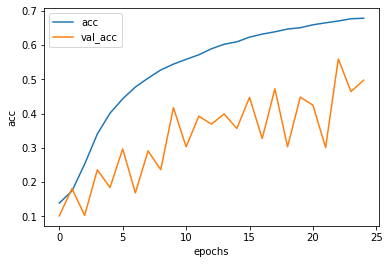

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot( history.history['acc'] )
plt.plot( history.history['val_acc'])
plt.xlabel( 'epochs' )
plt.ylabel( 'acc' )
plt.legend( ['acc', 'val_acc'] )

plt.savefig('ResNet_58layers.png')
plt.show()

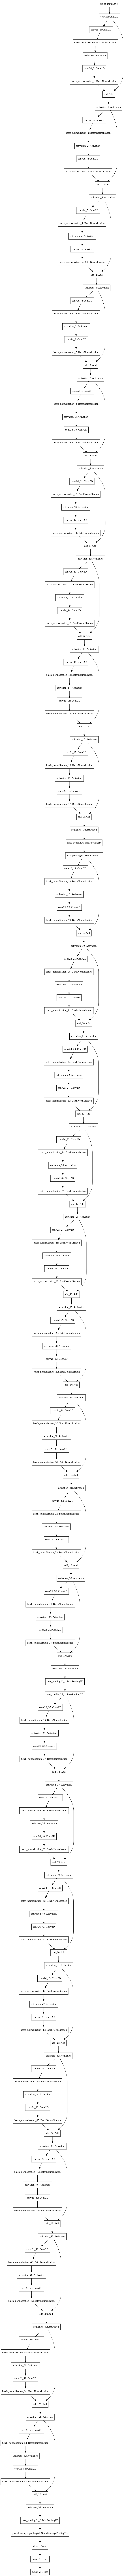

In [0]:
keras.utils.plot_model(model, 'Model_58layers.png')